In [61]:
# Questions:
# 1. Which game is the oldest and newest in the dataset?
# 2. Which publisher published the most games?
# 3. Which developer developed the most games?
# 4. Which series has the most sales?
# 5. which series has the most games?

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Data from Google Sheets

In [63]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/edit#gid=1485085913'
sheet_url_trf = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
print(sheet_url_trf)

https://docs.google.com/spreadsheets/d/1z46qH9il8OfVkYBZMMDUYq_GYHp77_prgkKq6HysZts/export?format=csv&gid=1485085913


# Data Cleansing

In [64]:
df = pd.read_csv(sheet_url_trf)
df['Release'] = pd.to_datetime(df['Release'])
df = df.drop_duplicates()
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Name       175 non-null    object        
 1   Sales      175 non-null    float64       
 2   Series     139 non-null    object        
 3   Release    175 non-null    datetime64[ns]
 4   Genre      175 non-null    object        
 5   Developer  175 non-null    object        
 6   Publisher  175 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 10.9+ KB


,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,2017-12-01,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,2011-11-01,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,2012-05-01,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,2006-11-01,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,2011-05-01,Action-adventure,Re-Logic,Re-Logic


# Which Game is the Oldest and Newest in the Dataset?

In [65]:
df[['Name', 'Release']].sort_values('Release', ascending=True).head()

,Name,Release
133,Hydlide,1984-12-01
34,Where in the World Is Carmen Sandiego?,1985-06-01
88,International Karate,1985-11-01
162,Tetris,1988-01-01
22,Last Ninja 2,1988-08-01


In [66]:
df[['Name', 'Release']].sort_values('Release', ascending=False).head()

,Name,Release
20,Valheim,2021-02-01
27,Cyberpunk 2077,2020-12-01
110,Crusader Kings III,2020-09-01
10,Fall Guys,2020-08-01
139,Mordhau,2019-04-01


In [67]:
# The oldest game in the dataset is 'Hydlide' released in 1984.
# The newest game in the dataset is 'Valheim' released in 2021.

# Which Publisher Published the Most Games?

In [68]:
agg_publisher = df.groupby('Publisher', as_index=False)['Name'].nunique()
agg_publisher.sort_values('Name', ascending=False)

,Publisher,Name
28,Electronic Arts,19
8,Blizzard Entertainment,8
62,Paradox Interactive,7
2,Activision,6
37,GT Interactive,5
...,...,...
36,Frontier Developments,1
35,Facepunch Studios,1
34,FX Interactive,1
33,Epyx,1


<Axes: xlabel='Publisher', ylabel='Name'>

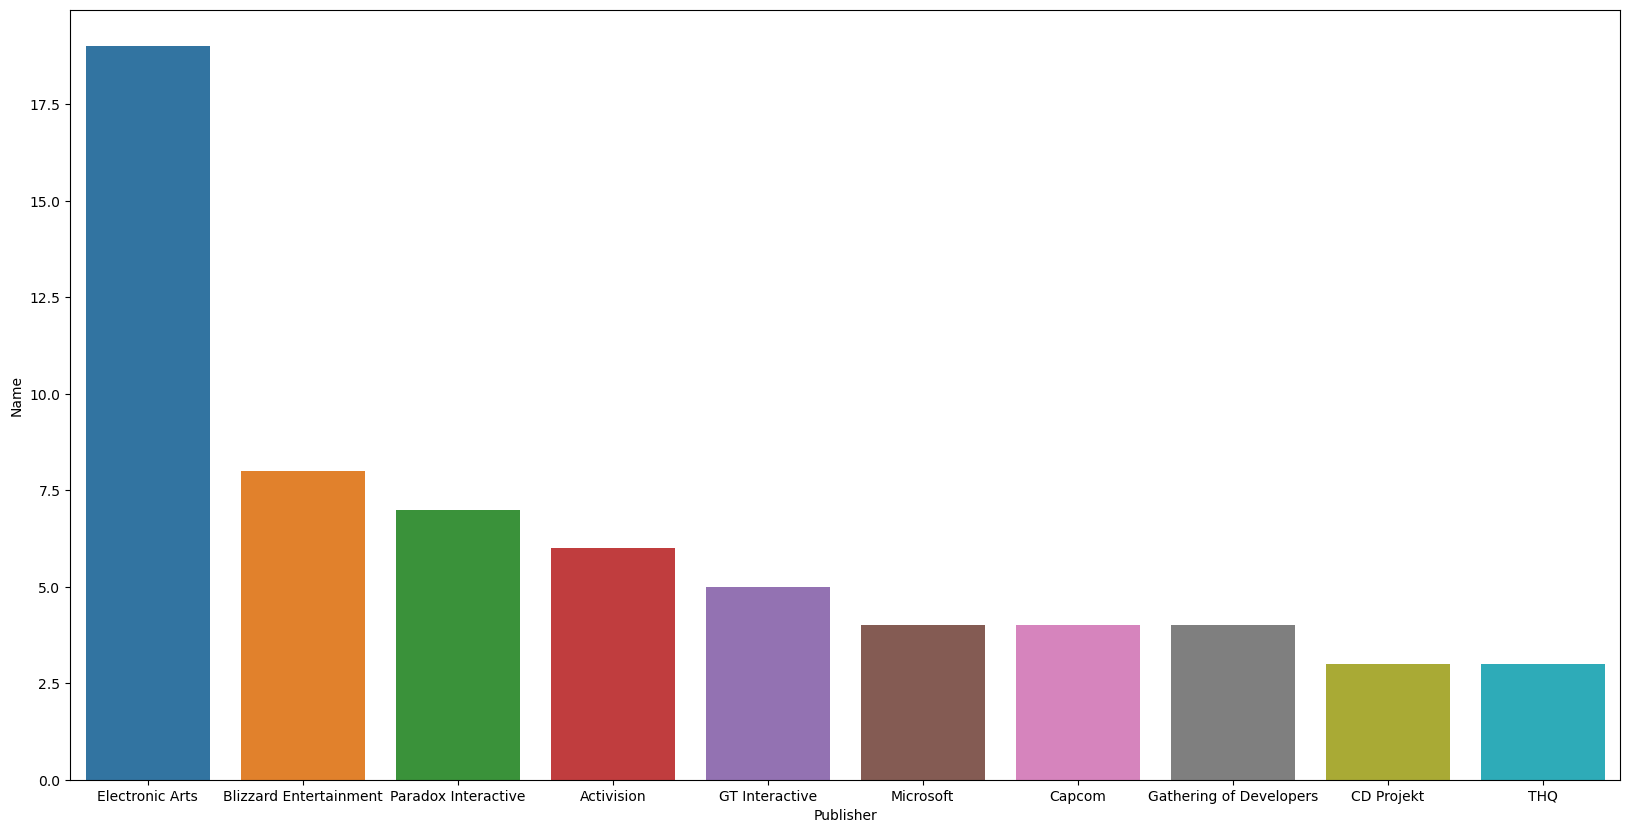

In [69]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x='Publisher', y='Name', data=agg_publisher.sort_values('Name', ascending=False).head(10))

In [70]:
# The publisher that published the most games is 'Electronic Arts' with 19 games.

# Which Developer Developed the Most Games?

In [71]:
agg_developer = df.groupby('Developer', as_index=False)['Name'].nunique()
agg_developer.sort_values('Name', ascending=False)

,Developer,Name
6,Blizzard Entertainment,8
60,Maxis,6
70,Paradox Development Studio,5
108,id Software,4
106,Westwood Studios,4
...,...,...
48,Introversion Software,1
47,Infocom,1
44,Heuristic Park,1
42,Gray Matter Interactive,1


<Axes: xlabel='Developer', ylabel='Name'>

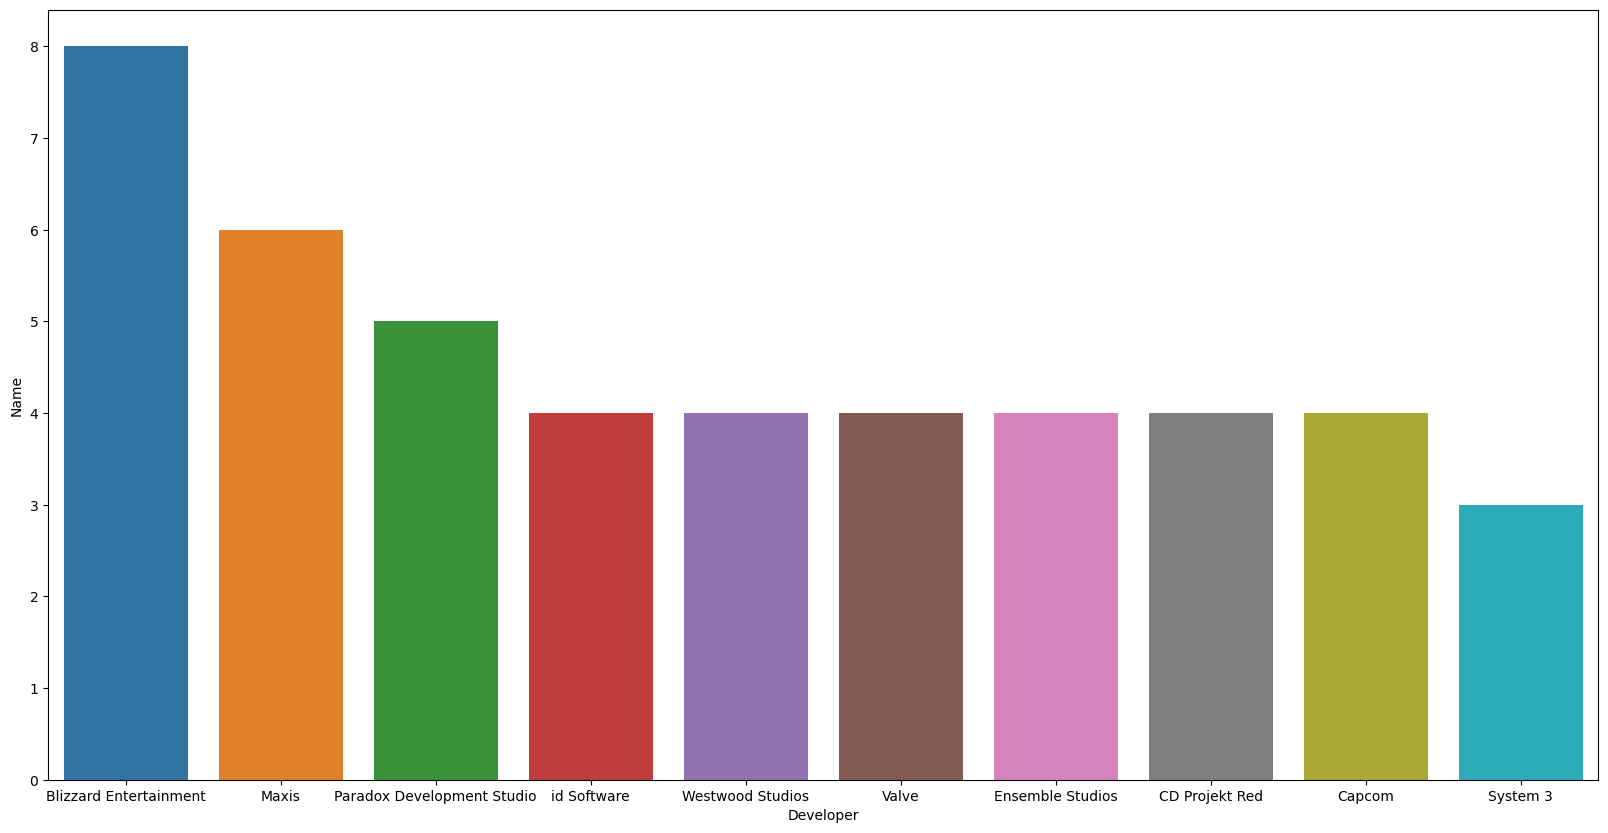

In [72]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x='Developer', y='Name', data=agg_developer.sort_values('Name', ascending=False).head(10))

In [73]:
# The developer that developed the most games is 'Blizzard Entertainment' with 8 games.

# Which Series has the Most Sales?

In [74]:
agg_series_sales = df.groupby('Series', as_index=False)['Sales'].sum()
agg_series_sales.sort_values('Sales', ascending=False)

,Series,Sales
47,Minecraft,33.0
22,Diablo,26.0
75,The Sims,24.0
36,Half-Life,21.0
85,Warcraft,19.0
...,...,...
60,RoboCop,1.0
46,Microsoft Flight Simulator,1.0
58,Railroad Tycoon,1.0
56,Psychonauts,1.0


<Axes: xlabel='Series', ylabel='Sales'>

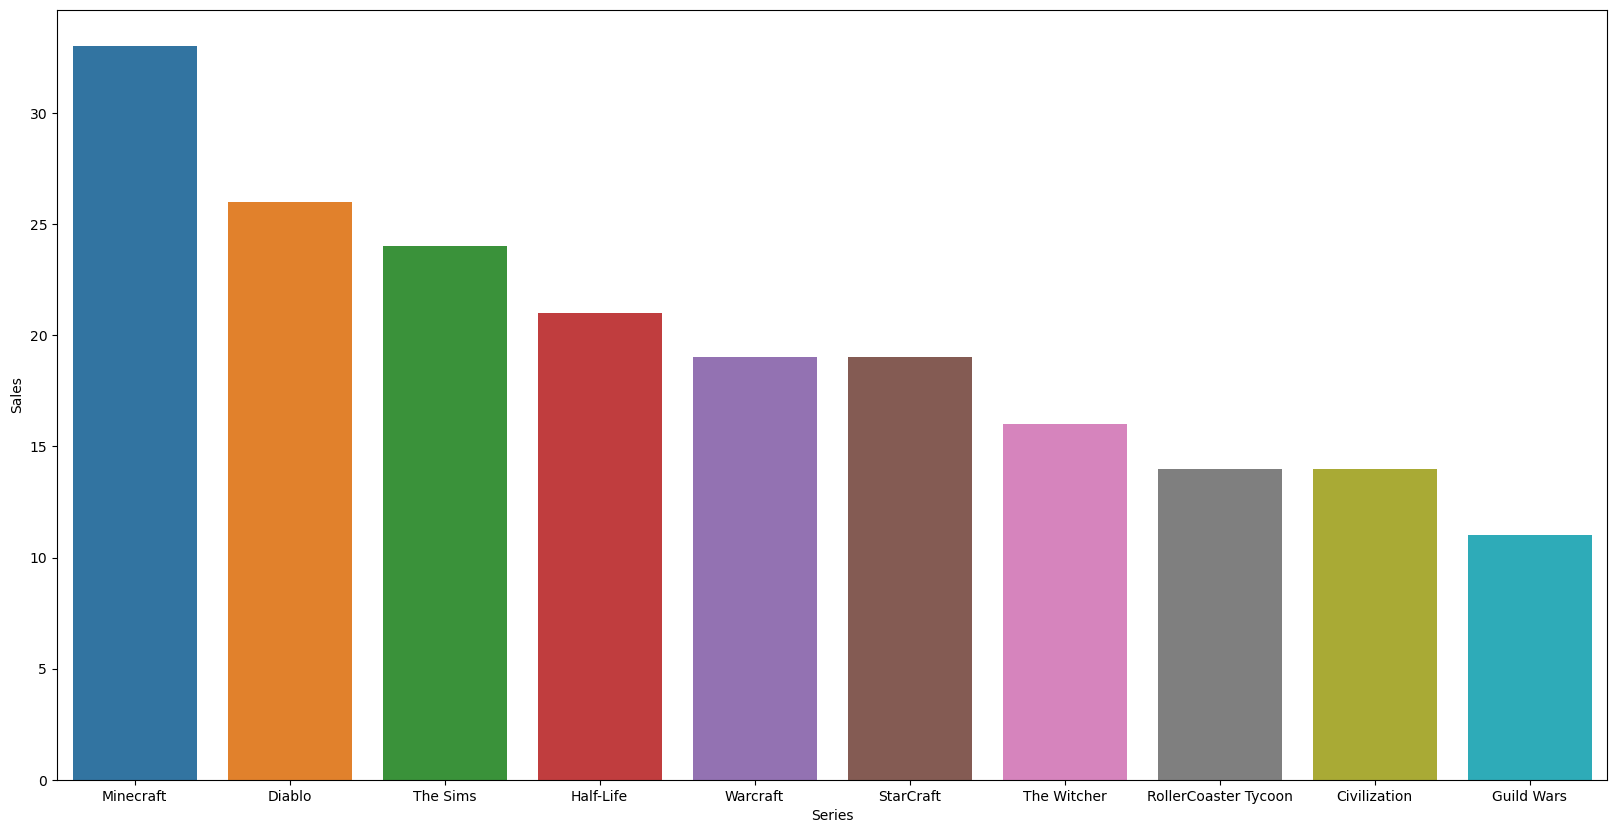

In [75]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x='Series', y='Sales', data=agg_series_sales.sort_values('Sales', ascending=False).head(10))

In [76]:
# The series that has the most sales is 'Minecraft' with 33 sales.

# Which Series has the Most Games?

In [77]:
agg_series_games = df.groupby('Series', as_index=False)['Name'].nunique()
agg_series_games.sort_values('Name', ascending=False)

,Series,Name
13,Command & Conquer,5
68,StarCraft,4
2,Age of Empires,4
12,Civilization,4
20,Dark Souls,3
...,...,...
41,International Karate,1
40,Hydlide,1
38,Hearts of Iron,1
37,Harry Potter,1


<Axes: xlabel='Series', ylabel='Name'>

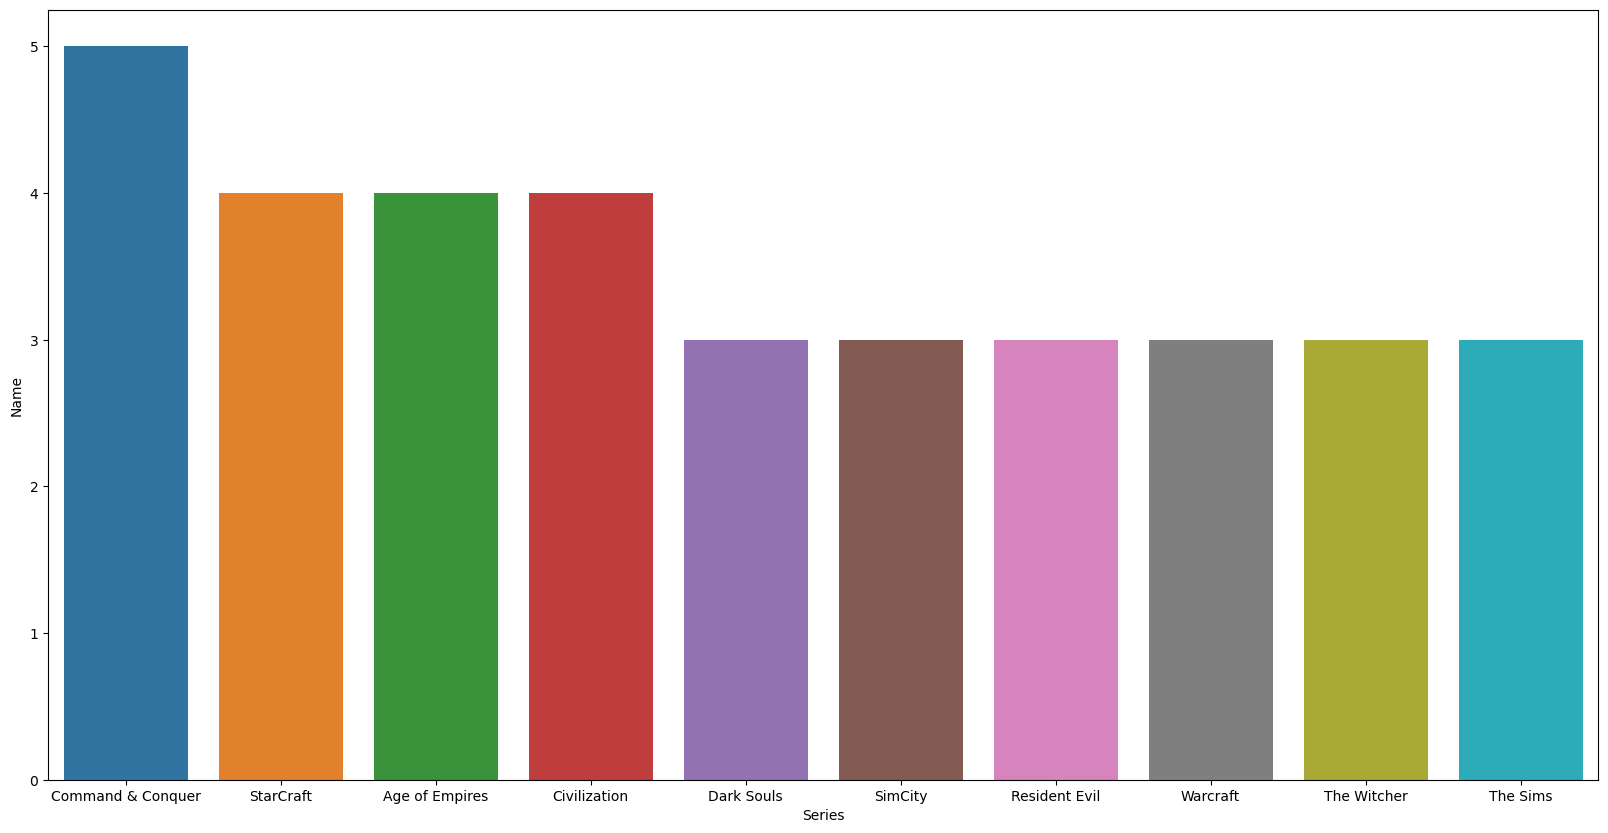

In [78]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.barplot(x='Series', y='Name', data=agg_series_games.sort_values('Name', ascending=False).head(10))

In [79]:
# The series that has the most games is 'Command & Conquer' with 5 games.